# Introduction

## Product Categorization

E-commerce being a highly competitive industry, needs efficient categorization of products based on their descriptions to enhance user experience and improve search accuracy. This could also be helpful for inventory management, and marketing strategies. This project focuses on developing a robust machine learning model to automatically classify products into predefined categories using natural language processing (NLP) techniques. 

## Project Overview

The objective of the notebook is to classify a product into its category based on the product description. There are 4 categories considered in the dataset : "Books", "Electonics", "Household", "Clothing & Accessories"
- Used <code>spaCy</code> for comprehensive text preprocessing, including tokenization, lemmatization, stop word removal, and entity recognition to enhance data quality. Implemented additional preprocessing steps such as lowercasing and special character removal.
- Word Vectorization method used : Term Frequency-Inverse Document Frequency (TF-IDF)
- Algorithms used : XGBoost, Random Forest Classifier, Logistic Regression, K-Nearest Neighbors

## Import Libraries

In [ ]:
import numpy as np 
import pandas as pd
import os
import re

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from wordcloud import WordCloud

import spacy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load the Dataset

In [2]:
data = pd.read_csv('ecommerceDataset.csv', header=None)
data.head()

,0,1
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [3]:
data.columns = ['category','description']
data.head()

,category,description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [4]:
data.shape

(50425, 2)

## Handling Missing Values

In [5]:
data.isnull().sum()

category       0
description    1
dtype: int64

In [6]:
data.dropna(inplace = True)

# Exploratory Data Analysis

In [7]:
data.describe(include='O')

,category,description
count,50424,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


## Category Frequencies

In [8]:
x = data['category'].value_counts()
x

category
Household                 19313
Books                     11820
Electronics               10621
Clothing & Accessories     8670
Name: count, dtype: int64

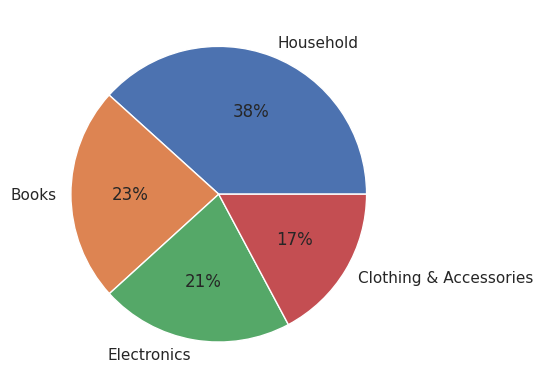

In [9]:
#Visualization of class frequencies

plt.pie(x.values, labels=x.keys(), autopct='%.0f%%')
plt.show()

## Word Cloud

### Word Cloud for Household

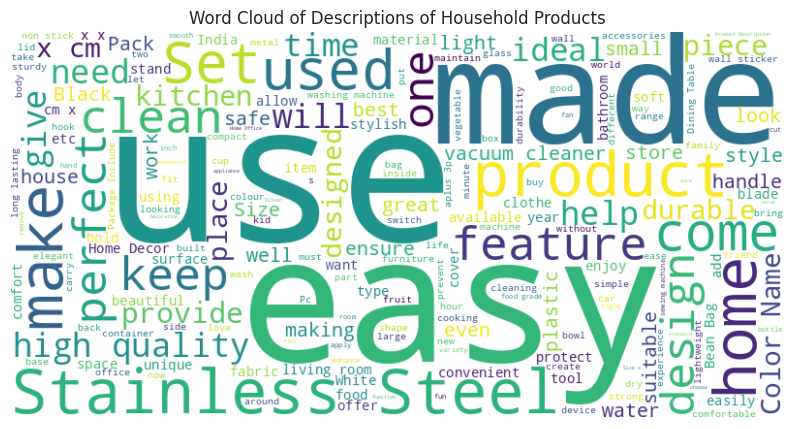

In [10]:
# Word cloud for household products descriptions
all_text = ' '.join(data[data['category']=='Household']['description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Descriptions of Household Products')
plt.axis('off')
plt.show()

### Word Cloud for Books

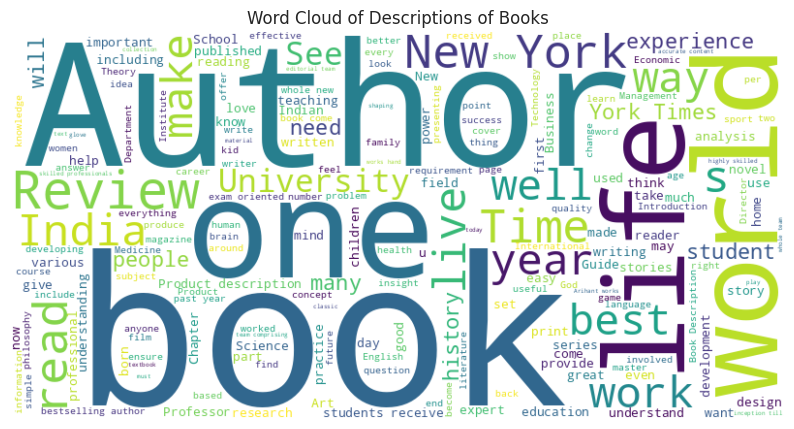

In [11]:
# Word cloud for book descriptions
all_text = ' '.join(data[data['category']=='Books']['description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Descriptions of Books')
plt.axis('off')
plt.show()

### Word Cloud for Electronics

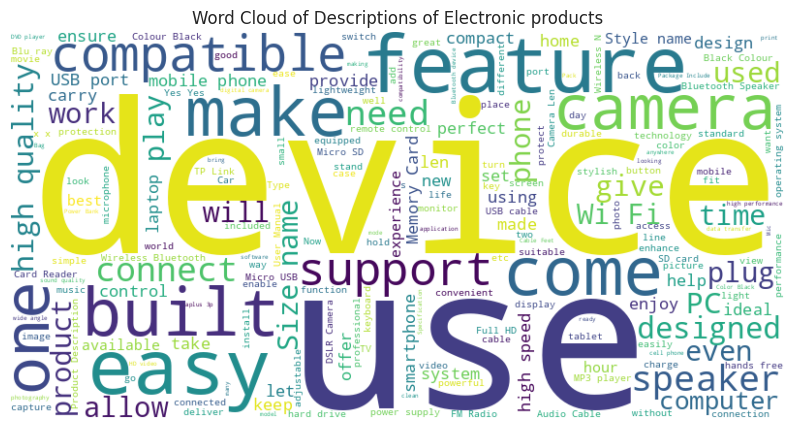

In [12]:
# Word cloud for Electronic product descriptions
all_text = ' '.join(data[data['category']=='Electronics']['description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Descriptions of Electronic products')
plt.axis('off')
plt.show()

### Word Cloud for Clothing & Accessories

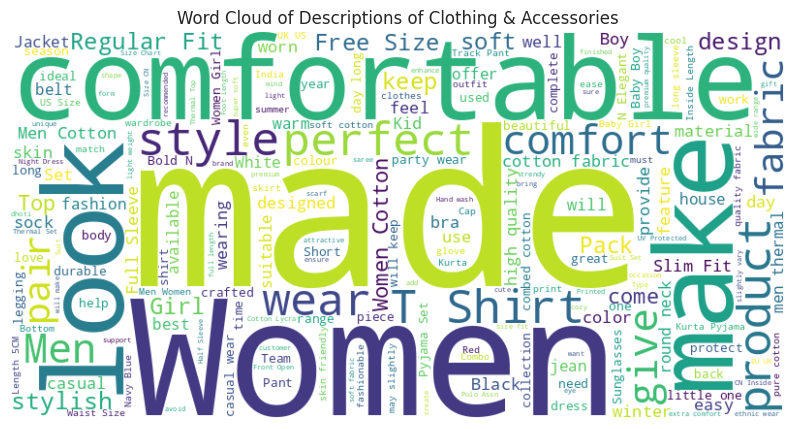

In [13]:
# Word cloud for Clothing & Accessories product descriptions
all_text = ' '.join(data[data['category']=='Clothing & Accessories']['description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Descriptions of Clothing & Accessories')
plt.axis('off')
plt.show()

# Data Preprocessing

In [14]:
nlp = spacy.load('en_core_web_sm')

In [15]:
def clean_text(text):
    # Converting to lowercase
    text = text.lower()
    
    #Removing special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    #Using spaCy to lemmatize, remove stop words, punctuations
    doc = nlp(text)
    tokens=[]
    for token in doc:
        if not token.is_stop and not token.is_punct:
            tokens.append(token.lemma_)
    x = ' '.join(tokens)
    return x

In [16]:
data['description'] = data['description'].apply(clean_text)

## Feature Encoding

In [17]:
labelencoder = LabelEncoder()
data['cat_encoded'] = labelencoder.fit_transform(data['category'])

In [18]:
#To see the category to encoding mapping
data[['category','cat_encoded']].value_counts()

category                cat_encoded
Household               3              19313
Books                   0              11820
Electronics             2              10621
Clothing & Accessories  1               8670
Name: count, dtype: int64

# Train-Validation-Test Split

In [19]:
# Feature-target split
X, y = data['description'], data['cat_encoded']

In [20]:
# Train-test split (from complete data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)
data_train = pd.concat([X_train, y_train], axis = 1)

In [21]:
# Validation-test split (from test data)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 40)
data_val, data_test = pd.concat([X_val, y_val], axis = 1), pd.concat([X_test, y_test], axis = 1)

# TF-IDF Vectorizer

In [22]:
# Features and labels
X_train, y_train = X_train.tolist(), y_train.tolist()
X_val, y_val = X_val.tolist(), y_val.tolist()
X_test, y_test = X_test.tolist(), y_test.tolist()

In [23]:
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train)
X_val_tfidf = TfidfVec.transform(X_val)
X_test_tfidf = TfidfVec.transform(X_test)

In [24]:
def model_score(model, X_train, y_train, X_val, y_val):
    
    model.fit(X_train, y_train)
    y_train_pred, y_val_pred = model.predict(X_train), model.predict(X_val)
    score_train = accuracy_score(y_train, y_train_pred)
    score_val = accuracy_score(y_val, y_val_pred)
    
    print('Model Training Accuracy', score_train)
    print('Model Validation Accuracy', score_val)
    
    return 

In [25]:
xgboost_model = XGBClassifier()
xgboost_ypred = model_score(xgboost_model, X_train_tfidf, y_train, X_val_tfidf, y_val)

Model Training Accuracy 0.9766829102447869
Model Validation Accuracy 0.9557112638815441


In [26]:
rf_model = RandomForestClassifier()
rf_ypred = model_score(rf_model, X_train_tfidf, y_train, X_val_tfidf, y_val)

Model Training Accuracy 0.9999150045330916
Model Validation Accuracy 0.969460602855632


In [27]:
knn_model = KNeighborsClassifier()
knn_model = model_score(knn_model,X_train_tfidf, y_train, X_val_tfidf, y_val)

Model Training Accuracy 0.7299127379873074
Model Validation Accuracy 0.6546800634584876


In [28]:
lr_model = LogisticRegression()
lr_model = model_score(lr_model,X_train_tfidf, y_train, X_val_tfidf, y_val)


Model Training Accuracy 0.9780711695376246
Model Validation Accuracy 0.969460602855632


# Model Evaluation

In [29]:
# Using Random Forest Classifier on the test data
rf_model.fit(X_train_tfidf, y_train)
y_pred = rf_model.predict(X_test_tfidf)
score_test = accuracy_score(y_test, y_pred)
print(pd.Series({"Test accuracy": score_test}).to_string())


Test accuracy    0.971576


Text(46.25, 0.5, 'Actual')

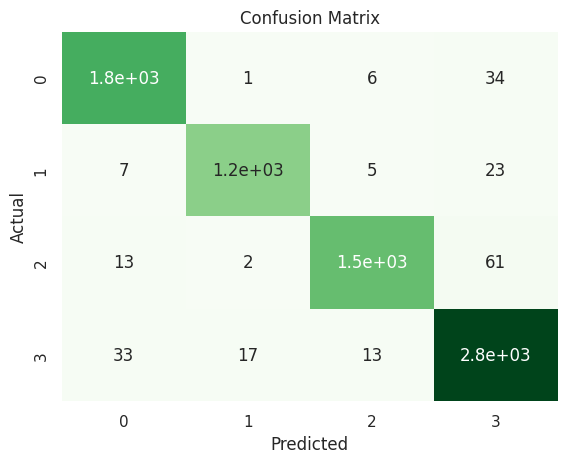

In [30]:
#Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Greens', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [31]:
#Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1793
           1       0.98      0.97      0.98      1278
           2       0.98      0.95      0.97      1587
           3       0.96      0.98      0.97      2906

    accuracy                           0.97      7564
   macro avg       0.97      0.97      0.97      7564
weighted avg       0.97      0.97      0.97      7564

